<a href="https://colab.research.google.com/github/BenRyan-8/APA_CA/blob/main/BERPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install openpyxl

In [3]:
import pandas as pd
import openpyxl

df = pd.read_excel('/content/drive/MyDrive/FourthYear/APA/BERPublicsearch.xlsx', nrows=100000)
df_copy=df.copy()

In [4]:
#for starting again
df=df_copy

In [5]:
df.columns.tolist()

['CountyName',
 'DwellingTypeDescr',
 'Year_of_Construction',
 'TypeofRating',
 'EnergyRating',
 'BerRating',
 'GroundFloorArea(sq m)',
 'UValueWall',
 'UValueRoof',
 'UValueFloor',
 'UValueWindow',
 'UvalueDoor',
 'WallArea',
 'RoofArea',
 'FloorArea',
 'WindowArea',
 'DoorArea',
 'NoStoreys',
 'CO2Rating',
 'MainSpaceHeatingFuel',
 'MainWaterHeatingFuel',
 'HSMainSystemEfficiency',
 'MultiDwellingMPRN',
 'TGDLEdition',
 'MPCDERValue',
 'HSEffAdjFactor',
 'HSSupplHeatFraction',
 'HSSupplSystemEff',
 'WHMainSystemEff',
 'WHEffAdjFactor',
 'SupplSHFuel',
 'SupplWHFuel',
 'SHRenewableResources',
 'WHRenewableResources',
 'NoOfChimneys',
 'NoOfOpenFlues',
 'NoOfFansAndVents',
 'NoOfFluelessGasFires',
 'DraftLobby',
 'VentilationMethod',
 'FanPowerManuDeclaredValue',
 'HeatExchangerEff',
 'StructureType',
 'SuspendedWoodenFloor',
 'PercentageDraughtStripped',
 'NoOfSidesSheltered',
 'PermeabilityTest',
 'PermeabilityTestResult',
 'TempAdjustment',
 'HeatSystemControlCat',
 'HeatSystemRespo

#Data Cleaning

In [6]:
cols_to_remove = [

    # DIRECT BER COMPONENTS
    "BerRating",
    "CO2Rating",

    # DELIVERED ENERGY FIELDS
    "DeliveredLightingEnergy",
    "DeliveredEnergyPumpsFans",
    "DeliveredEnergyMainWater",
    "DeliveredEnergyMainSpace",
    "DeliveredEnergySecondarySpace",
    "DeliveredEnergySupplementaryWater",
    "TotalDeliveredEnergy",

    # PRIMARY ENERGY FIELDS
    "PrimaryEnergyLighting",
    "PrimaryEnergyPumpsFans",
    "PrimaryEnergyMainWater",
    "PrimaryEnergyMainSpace",
    "PrimaryEnergySecondarySpace",
    "PrimaryEnergySupplementaryWater",

    # CO2 EMISSIONS FIELDS
    "CO2Lighting",
    "CO2PumpsFans",
    "CO2MainWater",
    "CO2MainSpace",
    "CO2SecondarySpace",
    "CO2SupplementaryWater",

    # DEAP COMPLIANCE & PERFORMANCE COEFFICIENTS
    "CPC",
    "EPC",
    "RER",
    "RenewEPnren",
    "RenewEPren",

    # HIGHLY DERIVED / SEMI-LEAKAGE FIELDS
    "LivingAreaPercent",

    # RENEWABLE ENERGY SUBCOMPONENT FIELDS
    # Renewable Energy 1
    "FirstEnergyTypeId",
    "FirstEnergyType_Description",
    "FirstEnerProdComment",
    "FirstEnerProdDelivered",
    "FirstPartLTotalContribution",
    "FirstEnerProdConvFactor",
    "FirstEnerProdCO2EmissionFactor",
    "FirstEnerConsumedComment",
    "FirstEnerConsumedDelivered",
    "FirstEnerConsumedConvFactor",
    "FirstEnerConsumedCO2EmissionFactor",

    # Renewable Energy 2
    "SecondEnergyTypeId",
    "SecondEnergyType_Description",
    "SecondEnerProdComment",
    "SecondEnerProdDelivered",
    "SecondPartLTotalContribution",
    "SecondEnerProdConvFactor",
    "SecondEnerProdCO2EmissionFactor",
    "SecondEnerConsumedComment",
    "SecondEnerConsumedDelivered",
    "SecondEnerConsumedConvFactor",
    "SecondEnerConsumedCO2EmissionFactor",

    # Renewable Energy 3
    "ThirdEnergyTypeId",
    "ThirdEnergyType_Description",
    "ThirdEnerProdComment",
    "ThirdEnerProdDelivered",
    "ThirdPartLTotalContribution",
    "ThirdEnerProdConvFactor",
    "ThirdEnerProdCO2EmissionFactor",
    "ThirdEnerConsumedComment",
    "ThirdEnerConsumedDelivered",
    "ThirdEnerConsumedConvFactor",
    "ThirdEnerConsumedCO2EmissionFactor",

    # GROUP HEATING SCHEME FIELDS
    "ChargingBasisHeatConsumed",
    "gsdHSSupplHeatFraction",
    "gsdHSSupplSystemEff",
    "DistLossFactor",
    "CHPUnitHeatFraction",
    "CHPSystemType",
    "CHPElecEff",
    "CHPHeatEff",
    "CHPFuelType",
    "SupplHSFuelTypeID",
    "gsdSHRenewableResources",
    "gsdWHRenewableResources",
    "SolarHeatFraction",
    "TotalPrimaryEnergyFact",
    "TotalCO2Emissions",

    # WALL-BY-WALL STRUCTURE FIELDS

    # First wall (GA → GG)
    "FirstWallType_Description",
    "FirstWallDescription",
    "FirstWallArea",
    "FirstWallUValue",
    "FirstWallIsSemiExposed",
    "FirstWallAgeBandId",
    "FirstWallTypeId",

    # Second wall (GH → GN)
    "SecondWallType_Description",
    "SecondWallDescription",
    "SecondWallArea",
    "SecondWallUValue",
    "SecondWallIsSemiExposed",
    "SecondWallAgeBandId",
    "SecondWallTypeId",

    # Third wall (GO → GU)
    "ThirdWallType_Description",
    "ThirdWallDescription",
    "ThirdWallArea",
    "ThirdWallUValue",
    "ThirdWallIsSemiExposed",
    "ThirdWallAgeBandId",
    "ThirdWallTypeId",

    # MISCELLANEOUS STRUCTURAL FIELDS
    "GroundFloorUValue",
    "LowEnergyLightingPercent",
    "PurposeOfRating",
    "DateOfAssessment",
    "VolumeOfPreHeatStore",

    # SPATIAL METADATA
    "SA_Code",
    "prob_smarea_error_0corr",
    "prob_smarea_error_100corr",

    # NEW — DEAP-DERIVED HEATING / CONTROL VARIABLES (MUST REMOVE)
    "HSSupplSystemEff",
    "WHMainSystemEff",
    "WHEffAdjFactor",
    "TempAdjustment",
    "HeatSystemControlCat",
    "HeatSystemResponseCat",
    "TempFactorUnadj",
    "TempFactorMultiplier",
    "PrimaryCircuitLoss",
    "CombiBoilerAddLoss"
]


In [7]:
df.drop(columns=cols_to_remove, inplace=True)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of missing values for each column
missing_data = df.isnull().sum() / len(df) * 100

# Filter out columns with no missing data if desired, or sort for better visualization
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)


Heatmap overview of missing data

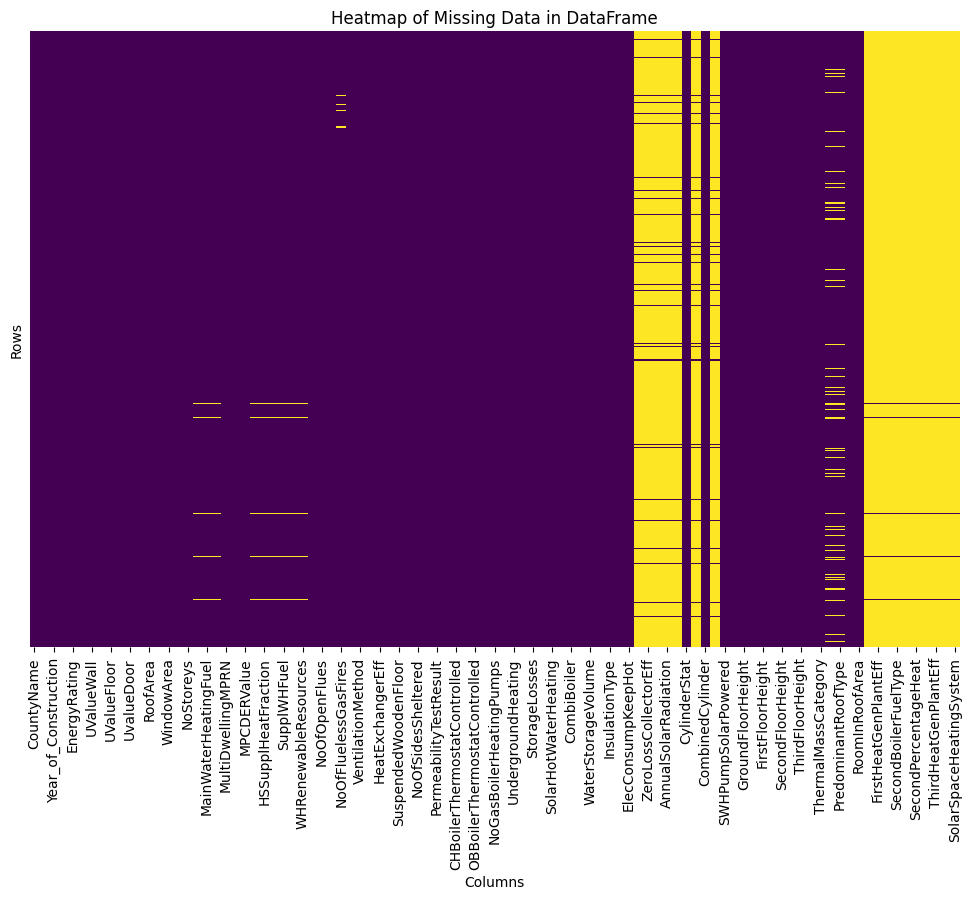

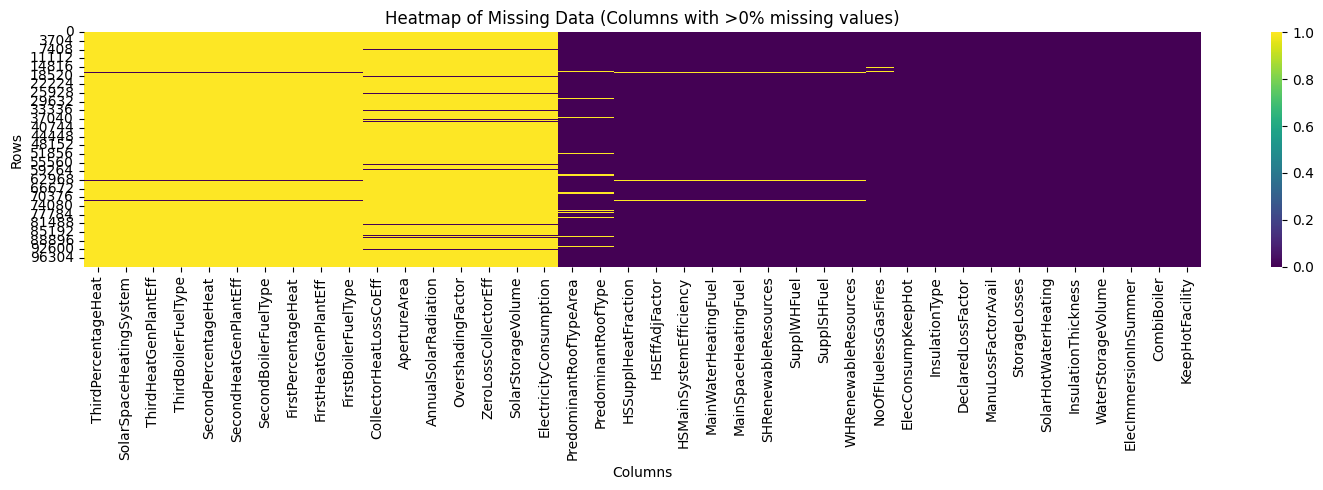

In [9]:
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.isnull(),
    cbar=False,
    cmap='viridis',
    yticklabels=False # Hide yticklabels as it's hard to read for large DFs
)
plt.title('Heatmap of Missing Data in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

# A more detailed heatmap of only columns with missing values (if `missing_data` Series is not empty)
if not missing_data.empty:
    plt.figure(figsize=(15, 5))
    sns.heatmap(
        df[missing_data.index].isnull(),
        cbar=True,
        cmap='viridis'
    )
    plt.title('Heatmap of Missing Data (Columns with >0% missing values)')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No columns with missing values to display a detailed heatmap.")


In [10]:
threshold = 0.9

# Identify columns with > 90% missing
cols_over_90_missing = df.columns[df.isna().mean() > threshold].tolist()

print("Columns with >90% missing:", cols_over_90_missing)
cols_over_90_missing

Columns with >90% missing: ['ApertureArea', 'ZeroLossCollectorEff', 'CollectorHeatLossCoEff', 'AnnualSolarRadiation', 'OvershadingFactor', 'SolarStorageVolume', 'ElectricityConsumption', 'FirstBoilerFuelType', 'FirstHeatGenPlantEff', 'FirstPercentageHeat', 'SecondBoilerFuelType', 'SecondHeatGenPlantEff', 'SecondPercentageHeat', 'ThirdBoilerFuelType', 'ThirdHeatGenPlantEff', 'ThirdPercentageHeat', 'SolarSpaceHeatingSystem']


['ApertureArea',
 'ZeroLossCollectorEff',
 'CollectorHeatLossCoEff',
 'AnnualSolarRadiation',
 'OvershadingFactor',
 'SolarStorageVolume',
 'ElectricityConsumption',
 'FirstBoilerFuelType',
 'FirstHeatGenPlantEff',
 'FirstPercentageHeat',
 'SecondBoilerFuelType',
 'SecondHeatGenPlantEff',
 'SecondPercentageHeat',
 'ThirdBoilerFuelType',
 'ThirdHeatGenPlantEff',
 'ThirdPercentageHeat',
 'SolarSpaceHeatingSystem']

In [11]:
# Filter the missing_data Series to include only columns identified as having >90% missing
missing_data_over_90 = missing_data[missing_data.index.isin(cols_over_90_missing)]

print("Columns with over 90% missing data and their percentages:")
display(missing_data_over_90.sort_values(ascending=False))


Columns with over 90% missing data and their percentages:


,0
ThirdPercentageHeat,98.673
SolarSpaceHeatingSystem,98.673
ThirdHeatGenPlantEff,98.673
ThirdBoilerFuelType,98.673
SecondPercentageHeat,98.673
SecondHeatGenPlantEff,98.673
SecondBoilerFuelType,98.673
FirstPercentageHeat,98.673
FirstHeatGenPlantEff,98.673
FirstBoilerFuelType,98.673


In [12]:
# Drop them
df.drop(columns=cols_over_90_missing, inplace=True)

dropping columns that only contain one value as it doesn't provide any value to the model

In [13]:
cols_to_drop_single_value = []
for col in df.columns:
    if df[col].nunique() == 1:
        cols_to_drop_single_value.append(col)

if cols_to_drop_single_value:
    print(f"Dropping {len(cols_to_drop_single_value)} columns with only one unique value: {cols_to_drop_single_value}")
    df.drop(columns=cols_to_drop_single_value, inplace=True)
    print("Columns dropped successfully.")
else:
    print("No columns found with only one unique value.")

# Display the shape of the DataFrame after dropping columns
print(f"New DataFrame shape: {df.shape}")

No columns found with only one unique value.
New DataFrame shape: (100000, 80)


Checking for how rare the A ratings are and then grouping them into just A

In [14]:
df["EnergyRating"].value_counts().sort_index()


,count
EnergyRating,
A1,1
A2,213
A3,1794
B1,1307
B2,2244
B3,6288
C1,10671
C2,12950
C3,13023


In [15]:
df["EnergyRating"] = df["EnergyRating"].replace({"A1":"A", "A2":"A", "A3":"A"})

In [16]:
# Remove leading/trailing whitespace and uppercase just in case
df["EnergyRating"] = df["EnergyRating"].astype(str).str.strip().str.upper()


In [17]:
# Remove leading/trailing whitespace from all object (string) columns in the DataFrame
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()

print("Removed leading/trailing whitespace from all string columns in the DataFrame.")

Removed leading/trailing whitespace from all string columns in the DataFrame.


In [18]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]

print(f"Number of duplicate rows dropped: {initial_rows - final_rows}")

Number of duplicate rows dropped: 1813


#Imputation

In [19]:
import numpy as np

# Identify column types automatically
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

In [20]:
numeric_cols, categorical_cols

(['Year_of_Construction',
  'GroundFloorArea(sq m)',
  'UValueWall',
  'UValueRoof',
  'UValueFloor',
  'UValueWindow',
  'UvalueDoor',
  'WallArea',
  'RoofArea',
  'FloorArea',
  'WindowArea',
  'DoorArea',
  'NoStoreys',
  'HSMainSystemEfficiency',
  'TGDLEdition',
  'MPCDERValue',
  'HSEffAdjFactor',
  'HSSupplHeatFraction',
  'SupplSHFuel',
  'SupplWHFuel',
  'SHRenewableResources',
  'WHRenewableResources',
  'NoOfChimneys',
  'NoOfOpenFlues',
  'NoOfFansAndVents',
  'NoOfFluelessGasFires',
  'FanPowerManuDeclaredValue',
  'HeatExchangerEff',
  'PercentageDraughtStripped',
  'NoOfSidesSheltered',
  'PermeabilityTestResult',
  'NoCentralHeatingPumps',
  'NoOilBoilerHeatingPumps',
  'NoGasBoilerHeatingPumps',
  'DistributionLosses',
  'WaterStorageVolume',
  'DeclaredLossFactor',
  'InsulationThickness',
  'ElecConsumpKeepHot',
  'GroundFloorArea',
  'GroundFloorHeight',
  'FirstFloorArea',
  'FirstFloorHeight',
  'SecondFloorArea',
  'SecondFloorHeight',
  'ThirdFloorArea',
  'Thi

##Numerical Imputation

In [21]:

numerical_but_categorical = [
    "TGDLEdition",
    "ThermalMassCategory",
    "PredominantRoofType",
    'SupplSHFuel',
    'SupplWHFuel',
    'SHRenewableResources',
    'WHRenewableResources',
    'HESSchemeUpgrade'
]

# Move overrides into categorical
for col in numerical_but_categorical:
    if col in numeric_cols:
        numeric_cols.remove(col)
    if col not in categorical_cols:
        categorical_cols.append(col)

df[numerical_but_categorical] = df[numerical_but_categorical].astype("str")


In [22]:
zero_counts = {}
# Filter for numerical columns
numeric_df = df.select_dtypes(include=['number'])

for col in numeric_df.columns:
    count = (numeric_df[col] == 0).sum()
    if count > 0:
        zero_counts[col] = count

if zero_counts:
    print("Number of 0's contained in each numerical column:")
    for col, count in zero_counts.items():
        print(f"Column '{col}': {count} zeros")
else:
    print("No numerical columns contain the value 0.")

Number of 0's contained in each numerical column:
Column 'UValueWall': 14 zeros
Column 'UValueRoof': 8959 zeros
Column 'UValueFloor': 10106 zeros
Column 'UValueWindow': 21 zeros
Column 'UvalueDoor': 11153 zeros
Column 'WallArea': 14 zeros
Column 'RoofArea': 8958 zeros
Column 'FloorArea': 10105 zeros
Column 'WindowArea': 21 zeros
Column 'DoorArea': 11157 zeros
Column 'HSSupplHeatFraction': 12955 zeros
Column 'NoOfChimneys': 39379 zeros
Column 'NoOfOpenFlues': 65847 zeros
Column 'NoOfFansAndVents': 14264 zeros
Column 'NoOfFluelessGasFires': 96489 zeros
Column 'FanPowerManuDeclaredValue': 96915 zeros
Column 'HeatExchangerEff': 96922 zeros
Column 'PercentageDraughtStripped': 4051 zeros
Column 'NoOfSidesSheltered': 6094 zeros
Column 'PermeabilityTestResult': 95238 zeros
Column 'NoCentralHeatingPumps': 14897 zeros
Column 'NoOilBoilerHeatingPumps': 59743 zeros
Column 'NoGasBoilerHeatingPumps': 60936 zeros
Column 'DistributionLosses': 2898 zeros
Column 'WaterStorageVolume': 4946 zeros
Column '

In [23]:
total_rows = len(df)

# Filter for columns that have more than 90% zeros
zero_percentage_threshold = 0.9

cols_with_high_zeros = {}
for col, count in zero_counts.items():
    percentage = count / total_rows
    if percentage > zero_percentage_threshold:
        cols_with_high_zeros[col] = percentage

if cols_with_high_zeros:
    print(f"Columns with more than {zero_percentage_threshold * 100}% zeros:")
    for col, percentage in cols_with_high_zeros.items():
        print(f"- Column '{col}': {percentage:.2%} zeros")
else:
    print(f"No numerical columns found with more than {zero_percentage_threshold * 100}% zeros.")

Columns with more than 90.0% zeros:
- Column 'NoOfFluelessGasFires': 98.27% zeros
- Column 'FanPowerManuDeclaredValue': 98.70% zeros
- Column 'HeatExchangerEff': 98.71% zeros
- Column 'PermeabilityTestResult': 97.00% zeros
- Column 'DeclaredLossFactor': 96.92% zeros
- Column 'ElecConsumpKeepHot': 99.65% zeros
- Column 'SecondFloorArea': 95.43% zeros
- Column 'SecondFloorHeight': 95.43% zeros
- Column 'ThirdFloorArea': 98.05% zeros
- Column 'ThirdFloorHeight': 98.05% zeros
- Column 'RoomInRoofArea': 94.57% zeros


In [24]:
# Drop columns with more than 90% zeros
if cols_with_high_zeros:
    cols_to_drop_high_zeros = list(cols_with_high_zeros.keys())
    df.drop(columns=cols_to_drop_high_zeros, inplace=True)
    print(f"Dropped {len(cols_to_drop_high_zeros)} columns with >90% zeros: {cols_to_drop_high_zeros}")
else:
    print("No columns with >90% zeros to drop.")

print(f"New DataFrame shape: {df.shape}")

Dropped 11 columns with >90% zeros: ['NoOfFluelessGasFires', 'FanPowerManuDeclaredValue', 'HeatExchangerEff', 'PermeabilityTestResult', 'DeclaredLossFactor', 'ElecConsumpKeepHot', 'SecondFloorArea', 'SecondFloorHeight', 'ThirdFloorArea', 'ThirdFloorHeight', 'RoomInRoofArea']
New DataFrame shape: (98187, 69)


In [25]:
# Remove columns that were dropped due to high zero percentage from the numeric_cols list
numeric_cols = [col for col in numeric_cols if col not in cols_to_drop_high_zeros]
print("Updated numeric_cols:")
print(numeric_cols)

Updated numeric_cols:
['Year_of_Construction', 'GroundFloorArea(sq m)', 'UValueWall', 'UValueRoof', 'UValueFloor', 'UValueWindow', 'UvalueDoor', 'WallArea', 'RoofArea', 'FloorArea', 'WindowArea', 'DoorArea', 'NoStoreys', 'HSMainSystemEfficiency', 'MPCDERValue', 'HSEffAdjFactor', 'HSSupplHeatFraction', 'NoOfChimneys', 'NoOfOpenFlues', 'NoOfFansAndVents', 'PercentageDraughtStripped', 'NoOfSidesSheltered', 'NoCentralHeatingPumps', 'NoOilBoilerHeatingPumps', 'NoGasBoilerHeatingPumps', 'DistributionLosses', 'WaterStorageVolume', 'InsulationThickness', 'GroundFloorArea', 'GroundFloorHeight', 'FirstFloorArea', 'FirstFloorHeight', 'ThermalBridgingFactor', 'PredominantRoofTypeArea']


In [26]:
print("Columns subject to median imputation:")
print(numeric_cols)

print("\nMissing values in these columns before imputation:")
print(df[numeric_cols].isnull().sum())

Columns subject to median imputation:
['Year_of_Construction', 'GroundFloorArea(sq m)', 'UValueWall', 'UValueRoof', 'UValueFloor', 'UValueWindow', 'UvalueDoor', 'WallArea', 'RoofArea', 'FloorArea', 'WindowArea', 'DoorArea', 'NoStoreys', 'HSMainSystemEfficiency', 'MPCDERValue', 'HSEffAdjFactor', 'HSSupplHeatFraction', 'NoOfChimneys', 'NoOfOpenFlues', 'NoOfFansAndVents', 'PercentageDraughtStripped', 'NoOfSidesSheltered', 'NoCentralHeatingPumps', 'NoOilBoilerHeatingPumps', 'NoGasBoilerHeatingPumps', 'DistributionLosses', 'WaterStorageVolume', 'InsulationThickness', 'GroundFloorArea', 'GroundFloorHeight', 'FirstFloorArea', 'FirstFloorHeight', 'ThermalBridgingFactor', 'PredominantRoofTypeArea']

Missing values in these columns before imputation:
Year_of_Construction            0
GroundFloorArea(sq m)           0
UValueWall                      0
UValueRoof                      0
UValueFloor                     0
UValueWindow                    0
UvalueDoor                      0
WallArea   

Descriptive Statistics for PredominantRoofTypeArea:
count    89229.000000
mean        61.757065
std         36.736705
min          0.010000
25%         40.000000
50%         50.190000
75%         73.560000
max        820.000000
Name: PredominantRoofTypeArea, dtype: float64


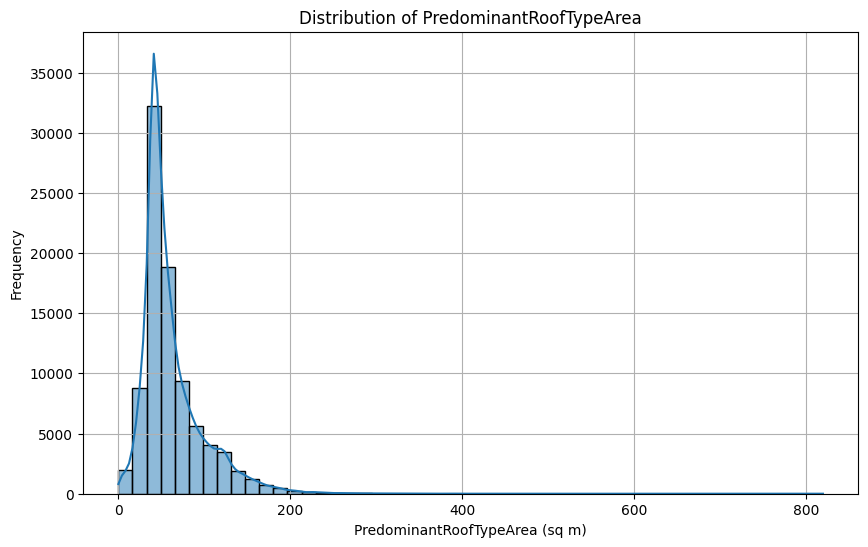

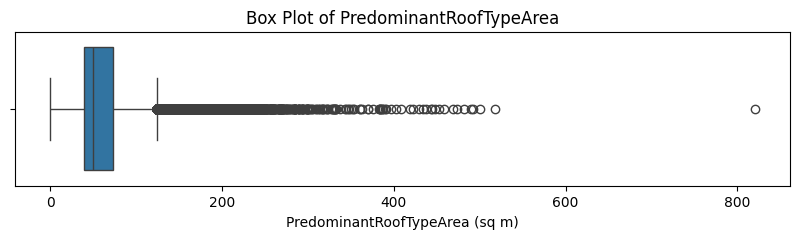

In [27]:
# Get the 'PredominantRoofTypeArea' column from the DataFrame
roof_area = df['PredominantRoofTypeArea']

# Display descriptive statistics
print("Descriptive Statistics for PredominantRoofTypeArea:")
print(roof_area.describe())

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(roof_area, kde=True, bins=50)
plt.title('Distribution of PredominantRoofTypeArea')
plt.xlabel('PredominantRoofTypeArea (sq m)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Optionally, a box plot to see outliers and quartiles more clearly
plt.figure(figsize=(10, 2))
sns.boxplot(x=roof_area)
plt.title('Box Plot of PredominantRoofTypeArea')
plt.xlabel('PredominantRoofTypeArea (sq m)')
plt.show()

In [28]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy="median")

df[numeric_cols] = median_imputer.fit_transform(df[numeric_cols])

##Categorical Imputation

In [29]:
def inspect_no_none_usage(df, categorical_cols):
    results = []

    for col in categorical_cols:
        uniques = df[col].dropna().unique()

        uses_no = any(
            str(v).strip().lower() == "no" for v in uniques
        )
        uses_none = any(
            str(v).strip().lower() == "none" for v in uniques
        )

        if uses_no or uses_none:
            results.append({
                "column": col,
                "uses_No": uses_no,
                "uses_None": uses_none,
                "unique_values": uniques
            })

    return pd.DataFrame(results)

# Run it
usage_df = inspect_no_none_usage(df, categorical_cols)

usage_df


,column,uses_No,uses_None,unique_values
0,MultiDwellingMPRN,True,False,"[NO, YES]"
1,DraftLobby,True,False,"[NO, YES]"
2,SuspendedWoodenFloor,True,False,"[No, Yes (Sealed), Yes (Unsealed)]"
3,PermeabilityTest,True,False,"[NO, YES]"
4,CHBoilerThermostatControlled,True,False,"[YES, NO]"
5,OBBoilerThermostatControlled,True,False,"[YES, NO]"
6,OBPumpInsideDwelling,True,False,"[NO, YES]"
7,WarmAirHeatingSystem,True,False,"[NO, YES]"
8,UndergroundHeating,True,False,"[NO, YES]"
9,StorageLosses,True,False,"[YES, NO, nan]"


In [30]:
impute_no = []
impute_none = []
impute_unknown = []

for col in categorical_cols:
    uniques = df[col].dropna().unique()
    lower_uniques = [str(u).strip().lower() for u in uniques]

    uses_no = "no" in lower_uniques
    uses_none = "none" in lower_uniques

    if uses_no and not uses_none:
        impute_no.append(col)
    elif uses_none and not uses_no:
        impute_none.append(col)
    else:
        impute_unknown.append(col)


In [31]:
impute_no, impute_none, impute_unknown

(['MultiDwellingMPRN',
  'DraftLobby',
  'SuspendedWoodenFloor',
  'PermeabilityTest',
  'CHBoilerThermostatControlled',
  'OBBoilerThermostatControlled',
  'OBPumpInsideDwelling',
  'WarmAirHeatingSystem',
  'UndergroundHeating',
  'StorageLosses',
  'ManuLossFactorAvail',
  'SolarHotWaterHeating',
  'ElecImmersionInSummer',
  'CylinderStat',
  'CombinedCylinder',
  'SWHPumpSolarPowered'],
 ['CombiBoiler', 'KeepHotFacility', 'InsulationType'],
 ['CountyName',
  'DwellingTypeDescr',
  'TypeofRating',
  'EnergyRating',
  'MainSpaceHeatingFuel',
  'MainWaterHeatingFuel',
  'VentilationMethod',
  'StructureType',
  'ThermalMassCategory',
  'PredominantRoofType',
  'TGDLEdition',
  'SupplSHFuel',
  'SupplWHFuel',
  'SHRenewableResources',
  'WHRenewableResources',
  'HESSchemeUpgrade'])

In [32]:
logical_zero_cols = [
    'HSSupplHeatFraction',
    'HSSupplSystemEff',
    'FanPowerManuDeclaredValue',
    'HeatExchangerEff'
]

for col in logical_zero_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)


In [33]:
df[impute_no] = df[impute_no].fillna("NO")
df[impute_none] = df[impute_none].fillna("None")
df[impute_unknown] = df[impute_unknown].fillna("Unknown")

Removing rows that don't contain an energy rating

In [34]:
original_len = len(df)
df = df[df["EnergyRating"] != "Unknown"]
new_len = len(df)

print(f"Removed {original_len - new_len} rows with unknown EnergyRating.")


Removed 0 rows with unknown EnergyRating.


In [35]:
df.isna().sum().sum()


np.int64(0)

In [36]:
df_clean = df.copy()
df_target = df["EnergyRating"]

In [37]:
df["CountyName"] = df["CountyName"].replace(
    to_replace=r".*Dublin.*",
    value="Co. Dublin",
    regex=True
)


In [38]:
tree_df = df.copy()
logreg_df = df.copy()

logreg_df.drop(columns=["EnergyRating"], inplace=True)

print("Tree-based dataset shape:", tree_df.shape)
tree_df.head()


Tree-based dataset shape: (98187, 69)


,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,...,SWHPumpSolarPowered,GroundFloorArea,GroundFloorHeight,FirstFloorArea,FirstFloorHeight,ThermalBridgingFactor,ThermalMassCategory,PredominantRoofTypeArea,PredominantRoofType,HESSchemeUpgrade
0,Co. Wexford,Detached house,2000.0,Existing,B3,233.78,0.28,0.23,0.41,2.71,...,NO,136.49,2.15,97.29,2.4,0.15,Medium,87.456,Pitch Roof-Insul.on Ceiling,1
1,Galway City,Semi-detached house,1982.0,Existing,C2,108.58,0.27,0.13,0.57,1.34,...,NO,54.29,2.40,54.29,2.7,0.15,Medium,54.290,Pitch Roof-Insul.on Ceiling,1
2,Co. Galway,Top-floor apartment,2002.0,Existing,C3,72.38,0.27,0.13,0.00,2.70,...,NO,72.38,2.50,0.00,0.0,0.15,Medium-low,72.380,Pitch Roof-Insul.on Ceiling,1
3,Co. Galway,Top-floor apartment,2002.0,Existing,C3,72.38,0.27,0.13,0.00,2.70,...,NO,72.38,2.50,0.00,0.0,0.15,Medium-low,72.380,Pitch Roof-Insul.on Ceiling,1
4,Co. Galway,Top-floor apartment,2002.0,Existing,D1,60.30,0.27,0.13,0.00,2.70,...,NO,60.30,2.45,0.00,0.0,0.15,Medium-low,60.300,Pitch Roof-Insul.on Ceiling,1


#Encoding Categorical Features

In [39]:
#not binary
impute_no.remove("SuspendedWoodenFloor")


binary_cols = impute_no

literally just all the different categorical columns to be encoded.

*Still need to go through this and clean it up*

In [40]:
binary_cols = impute_no

fuel_cols = [
    "MainSpaceHeatingFuel",
    "MainWaterHeatingFuel",
    "SupplSHFuel",
    "SupplWHFuel",
    "SHRenewableResources",
    "WHRenewableResources",
]
dwelling_cols = [
    "DwellingTypeDescr",
    "StructureType"
]
ventilation_cols = ["VentilationMethod"]
categorical_code_cols = [
    "TGDLEdition",
    "ThermalMassCategory",
    "PredominantRoofType"
]
location_cols = ["CountyName"]
other_categoricals = impute_unknown
multi_category_cols = ["SuspendedWoodenFloor"]
extra_categoricals = ['CombiBoiler', 'KeepHotFacility', 'InsulationType']


In [41]:
categorical_to_onehot = (
    fuel_cols
    + dwelling_cols
    + ventilation_cols
    + categorical_code_cols
    + location_cols
    + multi_category_cols
    + extra_categoricals
    + [
        col for col in other_categoricals
        if col not in (
            fuel_cols + dwelling_cols + ventilation_cols +
            categorical_code_cols + location_cols + multi_category_cols
        )
    ]
)

categorical_to_onehot.remove("EnergyRating")


In [42]:
#Encoding binary fields
for col in binary_cols:
    logreg_df[col] = logreg_df[col].map({"Yes": 1, "No": 0})


In [43]:
#One-hot encoding all categoricals
logreg_df = pd.get_dummies(
    logreg_df,
    columns=categorical_to_onehot,
    drop_first=False
)

print("Logistic Regression dataset shape:", logreg_df.shape)
logreg_df.head()


Logistic Regression dataset shape: (98187, 204)


,Year_of_Construction,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,WallArea,RoofArea,FloorArea,...,KeepHotFacility_nan,InsulationType_Factory Insulated,InsulationType_Loose Jacket,InsulationType_None,InsulationType_nan,TypeofRating_Existing,TypeofRating_Final,TypeofRating_Provisional,HESSchemeUpgrade_0,HESSchemeUpgrade_1
0,2000.0,233.78,0.28,0.23,0.41,2.71,3.0,137.89,157.26,136.49,...,False,True,False,False,False,True,False,False,False,True
1,1982.0,108.58,0.27,0.13,0.57,1.34,3.0,84.83,54.29,54.29,...,False,True,False,False,False,True,False,False,False,True
2,2002.0,72.38,0.27,0.13,0.00,2.70,0.0,51.98,72.38,0.00,...,False,True,False,False,False,True,False,False,False,True
3,2002.0,72.38,0.27,0.13,0.00,2.70,0.0,51.98,72.38,0.00,...,False,True,False,False,False,True,False,False,False,True
4,2002.0,60.30,0.27,0.13,0.00,2.70,0.0,46.63,60.30,0.00,...,False,True,False,False,False,True,False,False,False,True


In [44]:
# ---- Drop zero-variance columns ----
zero_var_cols = [col for col in logreg_df.columns if logreg_df[col].nunique() <= 1]

if zero_var_cols:
    print(f"Dropping {len(zero_var_cols)} zero-variance columns:")
    print(zero_var_cols)
    logreg_df.drop(columns=zero_var_cols, inplace=True)
else:
    print("No zero-variance columns found.")

print("Logistic Regression dataset shape after cleanup:", logreg_df.shape)


Dropping 15 zero-variance columns:
['MultiDwellingMPRN', 'DraftLobby', 'PermeabilityTest', 'CHBoilerThermostatControlled', 'OBBoilerThermostatControlled', 'OBPumpInsideDwelling', 'WarmAirHeatingSystem', 'UndergroundHeating', 'StorageLosses', 'ManuLossFactorAvail', 'SolarHotWaterHeating', 'ElecImmersionInSummer', 'CylinderStat', 'CombinedCylinder', 'SWHPumpSolarPowered']
Logistic Regression dataset shape after cleanup: (98187, 189)


In [45]:
logreg_df.columns.tolist()

['Year_of_Construction',
 'GroundFloorArea(sq m)',
 'UValueWall',
 'UValueRoof',
 'UValueFloor',
 'UValueWindow',
 'UvalueDoor',
 'WallArea',
 'RoofArea',
 'FloorArea',
 'WindowArea',
 'DoorArea',
 'NoStoreys',
 'HSMainSystemEfficiency',
 'MPCDERValue',
 'HSEffAdjFactor',
 'HSSupplHeatFraction',
 'NoOfChimneys',
 'NoOfOpenFlues',
 'NoOfFansAndVents',
 'PercentageDraughtStripped',
 'NoOfSidesSheltered',
 'NoCentralHeatingPumps',
 'NoOilBoilerHeatingPumps',
 'NoGasBoilerHeatingPumps',
 'DistributionLosses',
 'WaterStorageVolume',
 'InsulationThickness',
 'GroundFloorArea',
 'GroundFloorHeight',
 'FirstFloorArea',
 'FirstFloorHeight',
 'ThermalBridgingFactor',
 'PredominantRoofTypeArea',
 'MainSpaceHeatingFuel_Anthracite',
 'MainSpaceHeatingFuel_Bottled LPG',
 'MainSpaceHeatingFuel_Bulk LPG (propane or butane)',
 'MainSpaceHeatingFuel_Electricity',
 'MainSpaceHeatingFuel_Heating Oil',
 'MainSpaceHeatingFuel_House Coal',
 'MainSpaceHeatingFuel_Mains Gas',
 'MainSpaceHeatingFuel_Manufacture

In [46]:
#Validating
print("Remaining object columns:", logreg_df.select_dtypes(include=["object"]).columns.tolist())


Remaining object columns: []


In [47]:
tree_df.isna().sum().sum() == 0


np.True_

#Preparing for modelling

In [48]:
rating_order = ['A','B1','B2','B3','C1','C2','C3','D1','D2','E1','E2','F','G']
rating_to_num = {label: idx for idx, label in enumerate(rating_order)}

# Tree-based target
tree_y = tree_df['EnergyRating'].map(rating_to_num)
tree_X = tree_df.drop(columns=["EnergyRating"])

# LogReg target
y_logreg = df_target.map(rating_to_num)


In [49]:
tree_train_idx = tree_df["CountyName"] != "Co. Dublin"
tree_test_idx  = tree_df["CountyName"] == "Co. Dublin"

X_tree_train = tree_X.loc[tree_train_idx]
X_tree_test  = tree_X.loc[tree_test_idx]

y_tree_train = tree_y.loc[tree_train_idx]
y_tree_test  = tree_y.loc[tree_test_idx]


In [50]:
logreg_train_idx = logreg_df["CountyName_Co. Dublin"] == 0
logreg_test_idx  = logreg_df["CountyName_Co. Dublin"] == 1

X_logreg_train = logreg_df.loc[logreg_train_idx]
X_logreg_test  = logreg_df.loc[logreg_test_idx]

y_logreg_train = y_logreg.loc[logreg_train_idx]
y_logreg_test  = y_logreg.loc[logreg_test_idx]


In [51]:
!pip install mord


  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=8548f3a0f45fa4883d08231b32f9530b55ddf2236e34ac49278291a141d0de2a
  Stored in directory: /root/.cache/pip/wheels/80/3e/3b/13f1adf346cad0fec675db328e4b0d814795c6c8e2fb659122
Successfully built mord


In [52]:
import mord as m
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_logreg_train_scaled = scaler.fit_transform(X_logreg_train)
X_logreg_test_scaled  = scaler.transform(X_logreg_test)

##ordinal logistic regression (baseline)

In [53]:
#Training
model_ordlog = m.LogisticAT(alpha=1.0)

model_ordlog.fit(X_logreg_train_scaled, y_logreg_train)


LogisticAT()

In [54]:
#predicting
y_pred_ordlog = model_ordlog.predict(X_logreg_test_scaled)


In [55]:
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix

kappa = cohen_kappa_score(y_logreg_test, y_pred_ordlog, weights='quadratic')
print("Quadratic Weighted Kappa:", round(kappa, 4))

accuracy = accuracy_score(y_logreg_test, y_pred_ordlog)
print("Accuracy:", round(accuracy, 4))

Quadratic Weighted Kappa: 0.9708
Accuracy: 0.6223


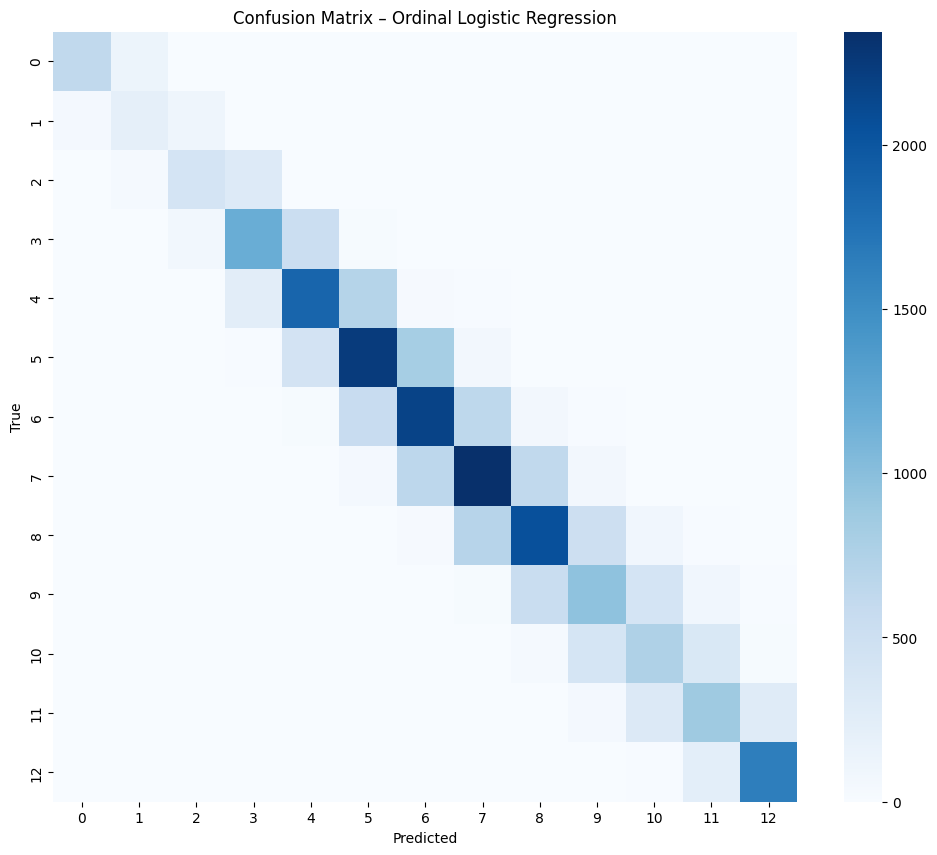

In [56]:
cm = confusion_matrix(y_logreg_test, y_pred_ordlog)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix – Ordinal Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Mulitnomial logistic regression (non-ordinal baseline)

In [57]:
from sklearn.linear_model import LogisticRegression

# Multinomial logistic regression model
model_multinom = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=500,
    n_jobs=-1
)

# Train the model
model_multinom.fit(X_logreg_train_scaled, y_logreg_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', n_jobs=-1)

In [58]:
#predictions
y_pred_multinom = model_multinom.predict(X_logreg_test_scaled)


In [59]:
kappa = cohen_kappa_score(y_logreg_test, y_pred_multinom, weights='quadratic')
print("Quadratic Weighted Kappa:", round(kappa, 4))

accuracy = accuracy_score(y_logreg_test, y_pred_multinom)
print("Accuracy:", round(accuracy, 4))

Quadratic Weighted Kappa: 0.9715
Accuracy: 0.6397


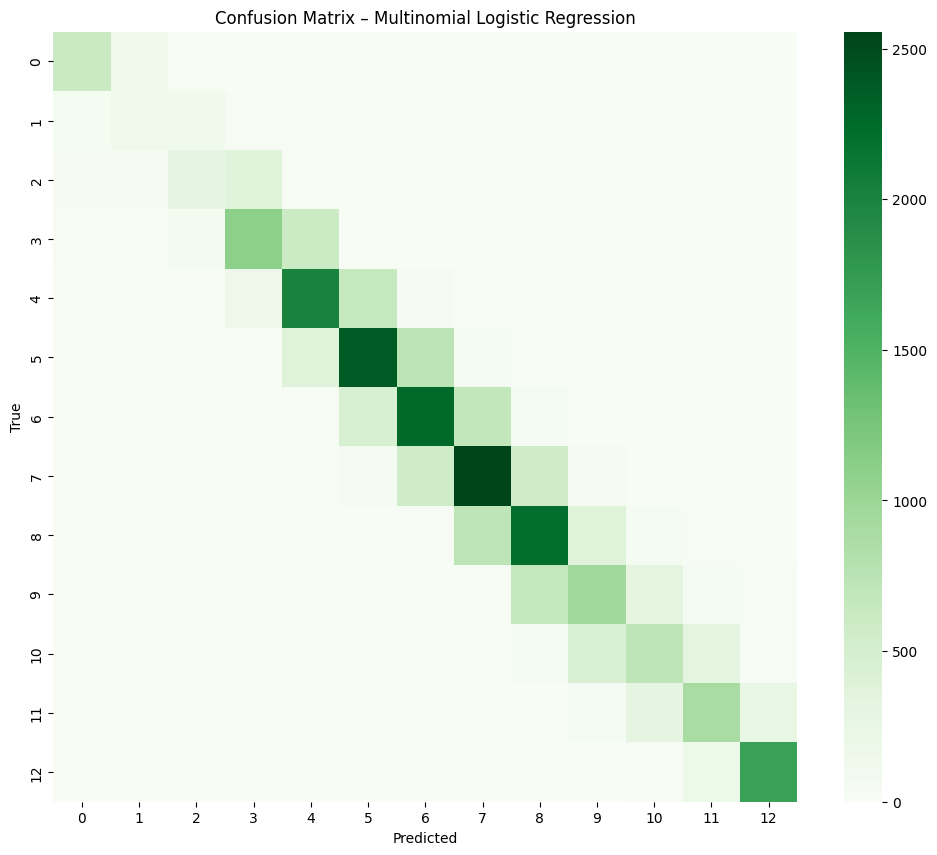

In [60]:
cm_multi = confusion_matrix(y_logreg_test, y_pred_multinom)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_multi, annot=False, cmap="Greens")
plt.title("Confusion Matrix – Multinomial Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

CatBoost (best for ordinal target values)

In [61]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [62]:
cat_features = X_tree_train.select_dtypes(include=["object"]).columns.tolist()
cat_features


['CountyName',
 'DwellingTypeDescr',
 'TypeofRating',
 'MainSpaceHeatingFuel',
 'MainWaterHeatingFuel',
 'MultiDwellingMPRN',
 'TGDLEdition',
 'SupplSHFuel',
 'SupplWHFuel',
 'SHRenewableResources',
 'WHRenewableResources',
 'DraftLobby',
 'VentilationMethod',
 'StructureType',
 'SuspendedWoodenFloor',
 'PermeabilityTest',
 'CHBoilerThermostatControlled',
 'OBBoilerThermostatControlled',
 'OBPumpInsideDwelling',
 'WarmAirHeatingSystem',
 'UndergroundHeating',
 'StorageLosses',
 'ManuLossFactorAvail',
 'SolarHotWaterHeating',
 'ElecImmersionInSummer',
 'CombiBoiler',
 'KeepHotFacility',
 'InsulationType',
 'CylinderStat',
 'CombinedCylinder',
 'SWHPumpSolarPowered',
 'ThermalMassCategory',
 'PredominantRoofType',
 'HESSchemeUpgrade']

In [63]:
#import os
#os.environ["LIBCUDA_FORCE_COMPATIBLE"] = "1"


In [64]:
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor(
    loss_function="RMSE",
    eval_metric="RMSE",
    iterations=2000,
    learning_rate=0.03,
    depth=8,
    l2_leaf_reg=5,
    random_seed=42,
    task_type="GPU",
    verbose=200,
    early_stopping_rounds=100
)

model_cat.fit(
    X_tree_train,
    y_tree_train,
    cat_features=cat_features,
    eval_set=(X_tree_test, y_tree_test),
    use_best_model=True
)


0:	learn: 2.7946512	test: 2.8560933	best: 2.8560933 (0)	total: 110ms	remaining: 3m 40s
200:	learn: 0.5007445	test: 0.6128421	best: 0.6128421 (200)	total: 26.8s	remaining: 4m
400:	learn: 0.4336472	test: 0.5386877	best: 0.5386877 (400)	total: 36.9s	remaining: 2m 27s
600:	learn: 0.4042543	test: 0.5066201	best: 0.5066201 (600)	total: 46s	remaining: 1m 46s
800:	learn: 0.3866648	test: 0.4879325	best: 0.4879325 (800)	total: 55.2s	remaining: 1m 22s
1000:	learn: 0.3744830	test: 0.4770535	best: 0.4770535 (1000)	total: 1m 2s	remaining: 1m 2s
1200:	learn: 0.3648548	test: 0.4690659	best: 0.4690659 (1200)	total: 1m 12s	remaining: 48.2s
1400:	learn: 0.3573013	test: 0.4632002	best: 0.4632002 (1400)	total: 1m 21s	remaining: 35s
1600:	learn: 0.3504651	test: 0.4588652	best: 0.4588652 (1600)	total: 1m 29s	remaining: 22.3s
1800:	learn: 0.3440987	test: 0.4550431	best: 0.4550431 (1800)	total: 1m 39s	remaining: 10.9s
1999:	learn: 0.3385212	test: 0.4522573	best: 0.4522573 (1999)	total: 1m 48s	remaining: 0us
be

In [66]:
# Continuous predictions
y_pred_cont = model_cat.predict(X_tree_test)

# Round to nearest ordinal label index
y_pred_cat = (
    np.round(y_pred_cont)
    .clip(0, max(rating_to_num.values()))
    .astype(int)
)


In [67]:
kappa_cat = cohen_kappa_score(y_tree_test, y_pred_cat, weights='quadratic')
print("CatBoost Quadratic Weighted Kappa:", round(kappa_cat, 4))

acc_cat = accuracy_score(y_tree_test, y_pred_cat)
print("CatBoost Accuracy:", round(acc_cat, 4))

CatBoost Quadratic Weighted Kappa: 0.9847
CatBoost Accuracy: 0.7694


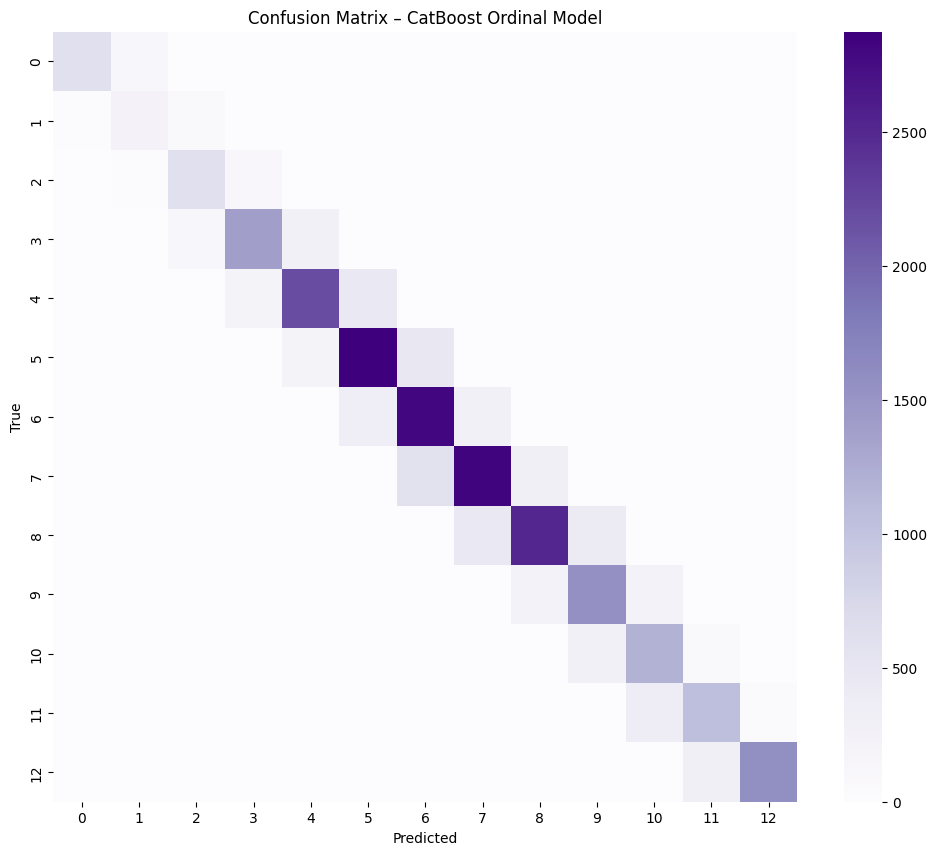

In [68]:
cm_cat = confusion_matrix(y_tree_test, y_pred_cat)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_cat, cmap="Purples", annot=False)
plt.title("Confusion Matrix – CatBoost Ordinal Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [69]:
!pip install lightgbm

In [71]:
for col in cat_features:
    X_tree_train[col] = X_tree_train[col].astype("category")
    X_tree_test[col] = X_tree_test[col].astype("category")


/tmp/ipython-input-477680080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tree_train[col] = X_tree_train[col].astype("category")
/tmp/ipython-input-477680080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tree_test[col] = X_tree_test[col].astype("category")
/tmp/ipython-input-477680080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [72]:
import lightgbm as lgb

# ---- LightGBM model ----
model_lgb = lgb.LGBMRegressor(
    objective="regression",
    metric="rmse",
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=8,
    reg_lambda=5,
    random_state=42
)

# Fit using sklearn API
model_lgb.fit(
    X_tree_train,
    y_tree_train,
    eval_set=[(X_tree_test, y_tree_test)],
    eval_metric="rmse",
    categorical_feature=cat_features,
    callbacks=[
        lgb.early_stopping(stopping_rounds=100, verbose=True)
    ]
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5449
[LightGBM] [Info] Number of data points in the train set: 70266, number of used features: 68
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.886062
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1999]	valid_0's rmse: 0.464976


LGBMRegressor(learning_rate=0.03, max_depth=8, metric='rmse', n_estimators=2000,
              objective='regression', random_state=42, reg_lambda=5)

In [73]:
# Predict continuous output
y_pred_cont_lgb = model_lgb.predict(X_tree_test)

# Round to ordinal class index
y_pred_lgb = (
    np.round(y_pred_cont_lgb)
    .clip(0, max(rating_to_num.values()))
    .astype(int)
)

LightGBM Ordinal Regression:
  Quadratic Weighted Kappa: 0.984
  Accuracy: 0.7565


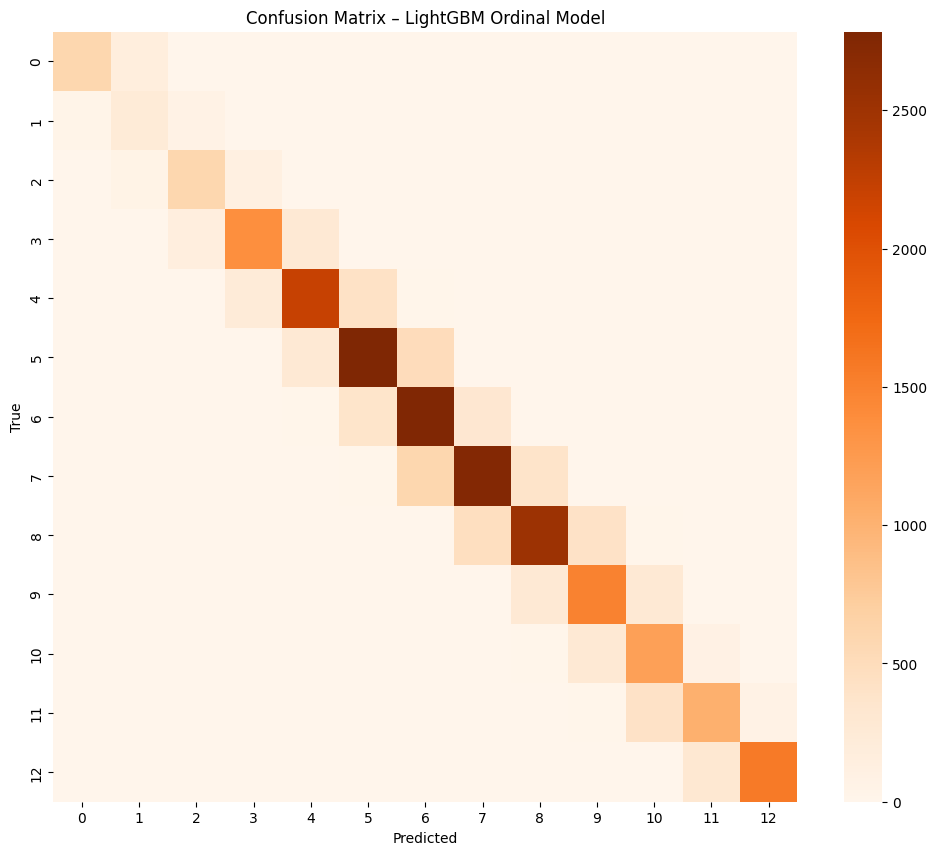

In [74]:
# ----------------------------
# Evaluate
# ----------------------------
kappa_lgb = cohen_kappa_score(y_tree_test, y_pred_lgb, weights="quadratic")
acc_lgb   = accuracy_score(y_tree_test, y_pred_lgb)

print("LightGBM Ordinal Regression:")
print("  Quadratic Weighted Kappa:", round(kappa_lgb, 4))
print("  Accuracy:", round(acc_lgb, 4))

# Confusion Matrix
cm_lgb = confusion_matrix(y_tree_test, y_pred_lgb)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_lgb, cmap="Oranges", annot=False)
plt.title("Confusion Matrix – LightGBM Ordinal Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [75]:
from sklearn.preprocessing import LabelEncoder

tree_df_encoded = tree_df.copy()

cat_cols = tree_df_encoded.select_dtypes(include=["object", "category"]).columns

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    tree_df_encoded[col] = le.fit_transform(tree_df_encoded[col].astype(str))
    label_encoders[col] = le

# Recreate splits
X_tree_train_enc = tree_df_encoded.loc[tree_train_idx].drop(columns=["EnergyRating"])
X_tree_test_enc  = tree_df_encoded.loc[tree_test_idx].drop(columns=["EnergyRating"])
y_tree_train_enc = y_tree_train
y_tree_test_enc  = y_tree_test


In [77]:
import xgboost as xgb

In [78]:
model_xgb = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=8,
    reg_lambda=5,
    subsample=0.9,
    colsample_bytree=0.9,
    tree_method="hist",  # CPU-compatible fast histogram algorithm
    random_state=42
)

model_xgb.fit(
    X_tree_train_enc,
    y_tree_train_enc,
    eval_set=[(X_tree_test_enc, y_tree_test_enc)],
    verbose=200
)


[0]	validation_0-rmse:2.85123
[200]	validation_0-rmse:0.56230
[400]	validation_0-rmse:0.51783
[600]	validation_0-rmse:0.50426
[800]	validation_0-rmse:0.49697
[1000]	validation_0-rmse:0.49288
[1200]	validation_0-rmse:0.49053
[1400]	validation_0-rmse:0.48897
[1600]	validation_0-rmse:0.48789
[1800]	validation_0-rmse:0.48727
[1999]	validation_0-rmse:0.48678


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2000,
             n_jobs=None, num_parallel_tree=None, ...)

In [79]:
# ---- Predictions ----
y_pred_cont_xgb = model_xgb.predict(X_tree_test_enc)

# Convert continuous → ordinal class
y_pred_xgb = (
    np.round(y_pred_cont_xgb)
    .clip(0, max(rating_to_num.values()))
    .astype(int)
)

XGBoost Ordinal – Quadratic Weighted Kappa: 0.9825
XGBoost Ordinal – Accuracy: 0.7502


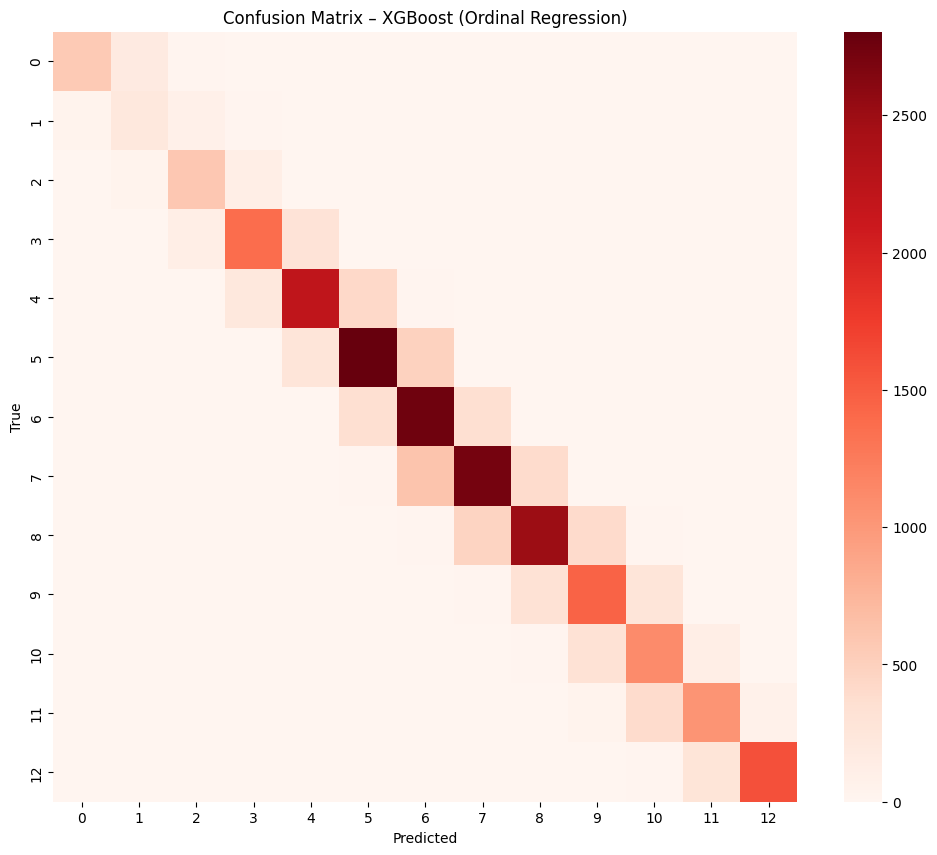

In [80]:
# ---- Evaluation ----
kappa_xgb = cohen_kappa_score(y_tree_test, y_pred_xgb, weights="quadratic")
acc_xgb = accuracy_score(y_tree_test, y_pred_xgb)

print("XGBoost Ordinal – Quadratic Weighted Kappa:", round(kappa_xgb, 4))
print("XGBoost Ordinal – Accuracy:", round(acc_xgb, 4))

cm_xgb = confusion_matrix(y_tree_test, y_pred_xgb)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_xgb, cmap="Reds", annot=False)
plt.title("Confusion Matrix – XGBoost (Ordinal Regression)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()